In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlgoogletrends/geoMap.csv


In [64]:
df=pd.read_csv("/kaggle/input/gtrends1/geoMap - geoMap.csv (4).csv")
df

,state,mlsrc,quantumsrc,dlsrc
0,Andaman & Nicobar Island,0,0,0
1,Andhra Pradesh,100,67,73
2,Arunanchal Pradesh,8,0,0
3,Assam,12,30,14
4,Bihar,13,20,8
5,Chandigarh,22,0,25
6,Chhattisgarh,18,17,18
7,Dadara & Nagar Havelli,0,0,0
8,Daman & Diu,0,0,0
9,Goa,14,33,25


In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt 

In [66]:
shp_gdf = gpd.read_file('/kaggle/input/indian-gis/Indian_States.shp')
shp_gdf.head(26)

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [67]:
merged = shp_gdf.set_index('st_nm').join(df.set_index('state'))
                                                     
merged

,geometry,mlsrc,quantumsrc,dlsrc
st_nm,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0,0,0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",8,0,0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",12,30,14
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",13,20,8
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",22,0,25
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",18,17,18
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0,0,0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0,0,0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",14,33,25


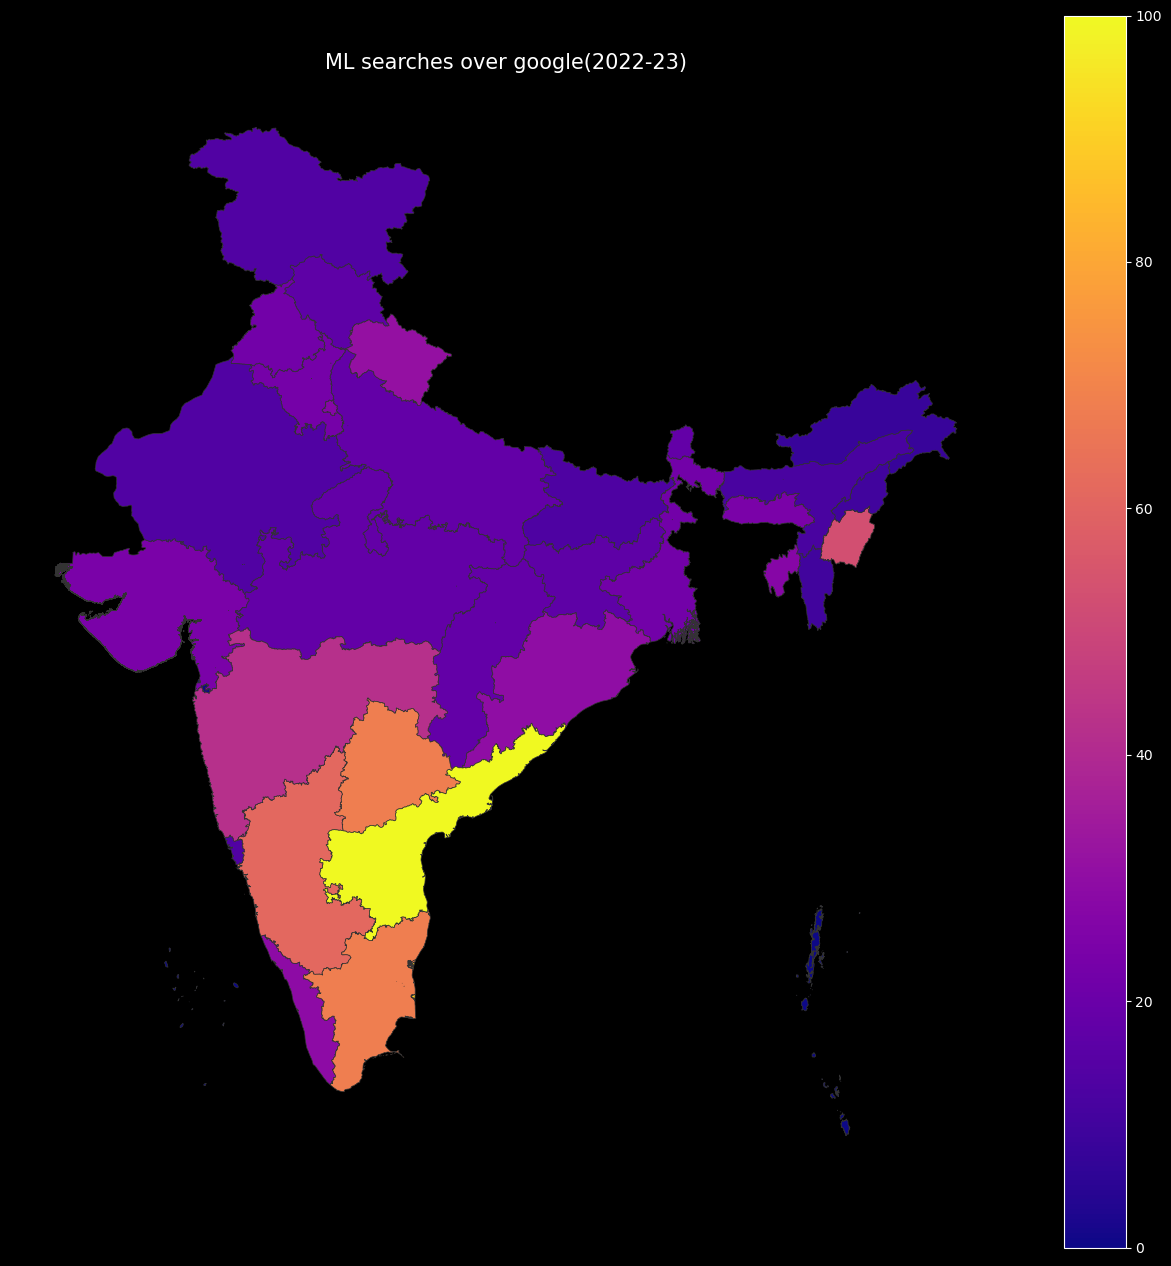

In [102]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('ML searches over google(2022-23)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='mlsrc', cmap='plasma', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

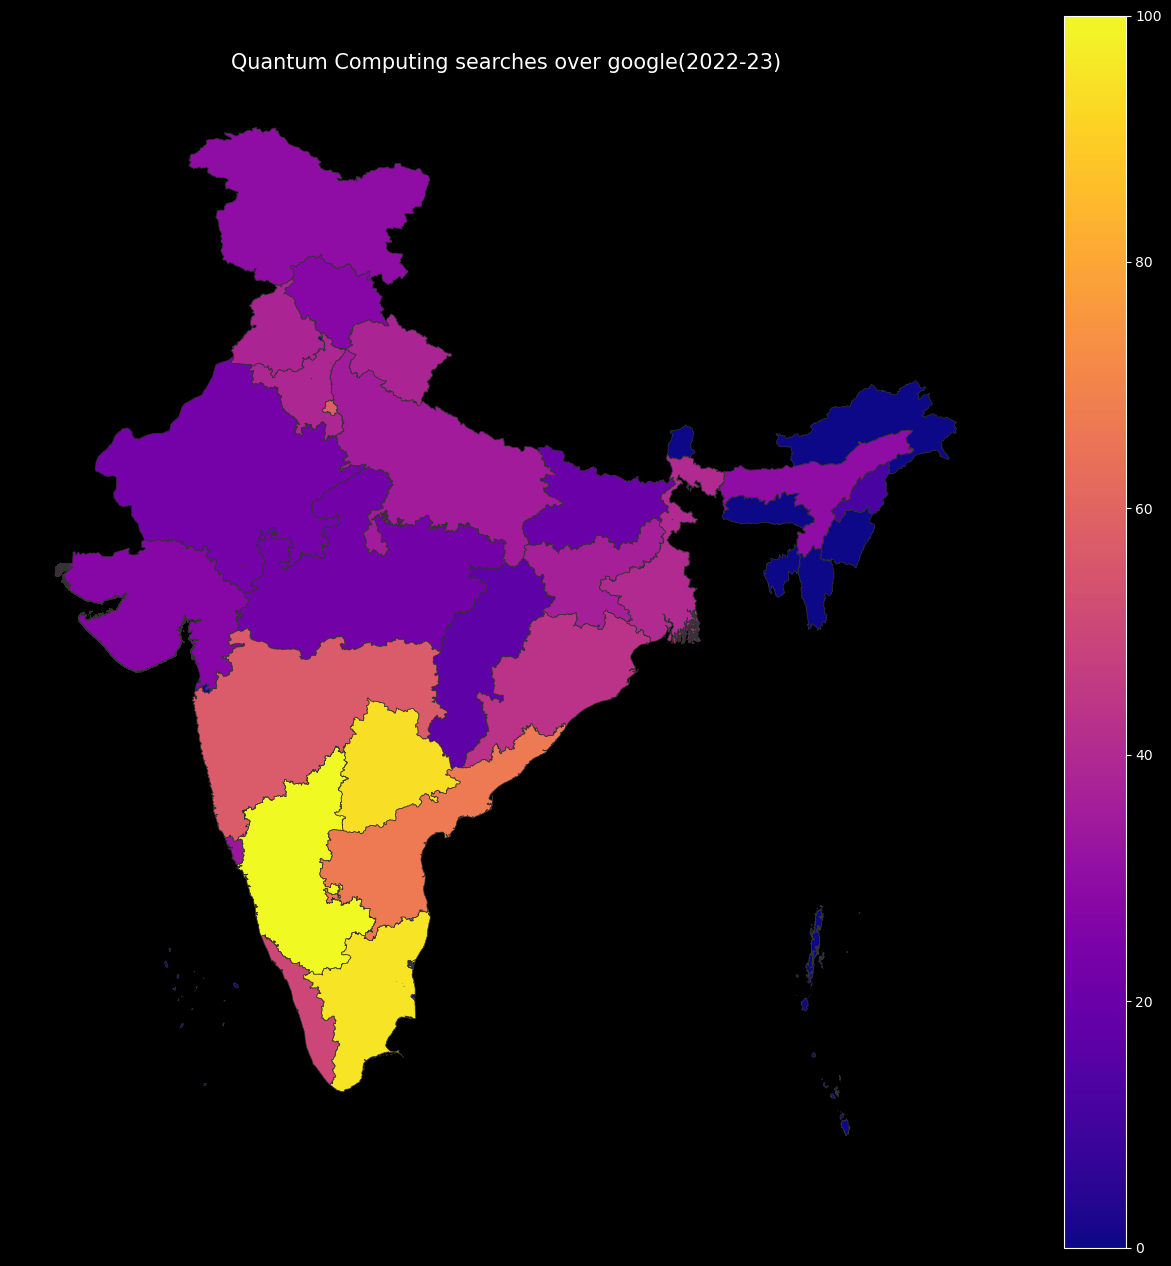

In [103]:
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('Quantum Computing searches over google(2022-23)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='quantumsrc', cmap='plasma', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

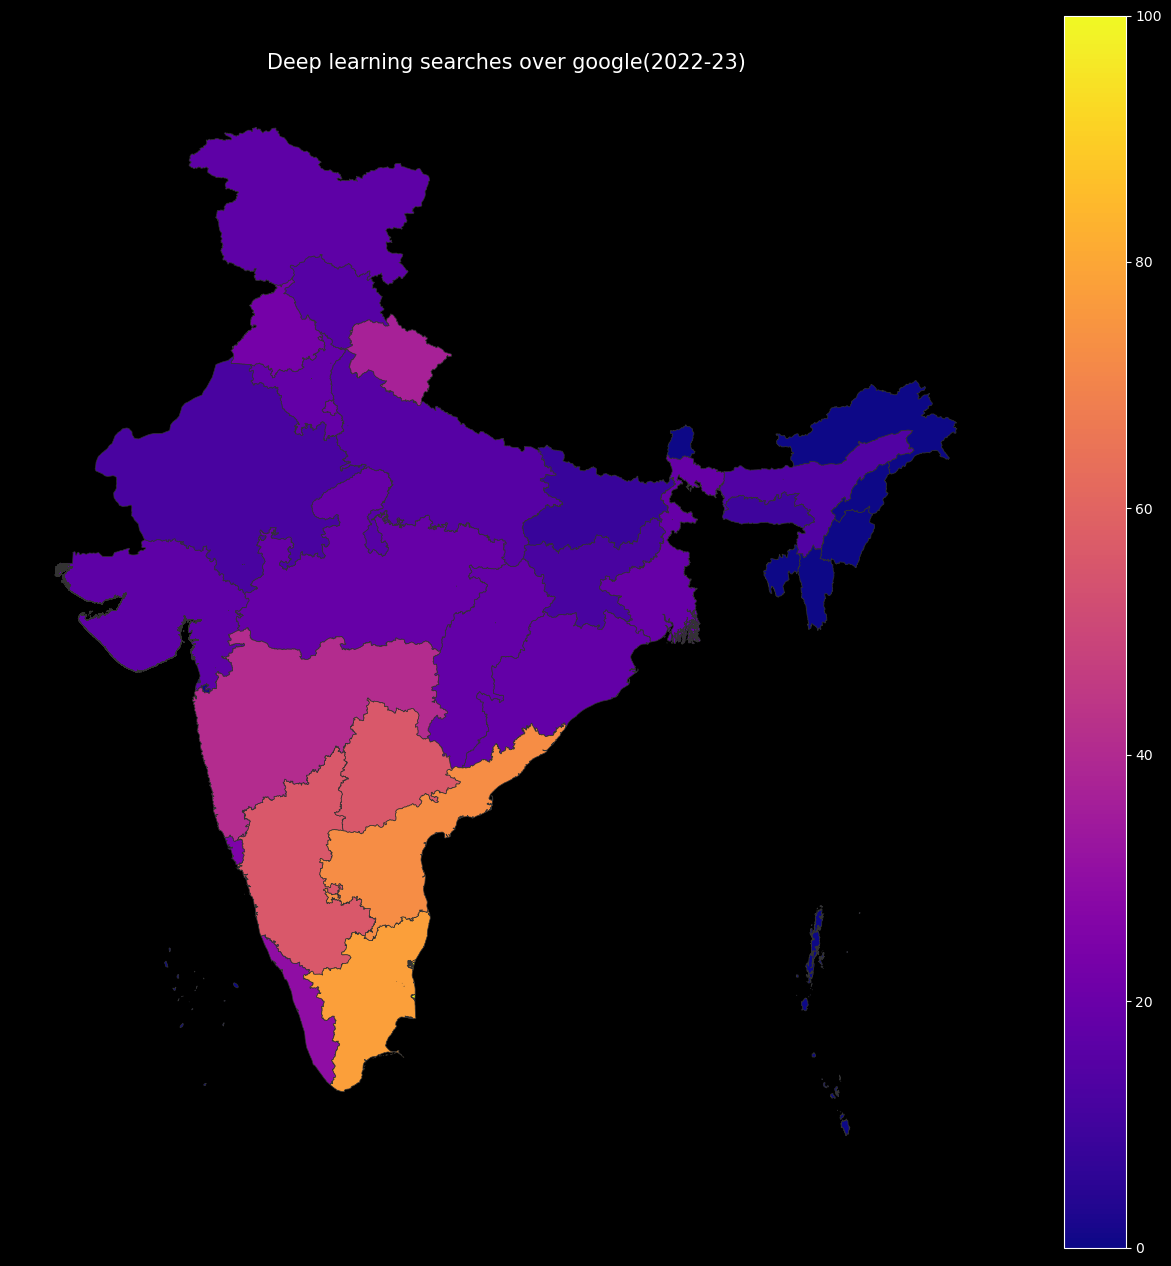

In [105]:
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('Deep learning searches over google(2022-23)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='dlsrc', cmap='plasma', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)